In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Loading the data
[Source](https://data.worldbank.org/indicator/SP.POP.TOTL?end=2020&start=1960&view=chart)

In [3]:
df = pd.read_csv('PopulationData.csv')
world_data = df[df['Country Name'] == 'World']

## Formatting the data:

In [4]:
population_data = world_data.to_numpy()[0][4:].astype(float) # Removing the first few non-data columns
for i in range(len(population_data)):
    population_data[i] = population_data[i]/1000000000 # Converting to billions to prevent overflow errors

years = world_data.columns.to_numpy()[4:] # Removing the first few non-data columns
for i in range(len(years)): # Converting the years to integers
    years[i] = years[i][:4]
years = years.astype(float)

## Defining the growth function:
This model is utilizing a logistic function to fit the data.

In [5]:
# Source: https://stackoverflow.com/questions/60160803/scipy-optimize-curve-fit-for-logistic-function
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

## Creating the Model:

In [6]:
params, covariance = curve_fit(logistic_function, years, population_data, p0=[2, 1960, .5, 2000]) # p0 is the initial guess for the parameters
r2 = r2_score(population_data, logistic_function(years, *params)) # Calculating the R^2 value
print('R-Squared:', r2)

R-Squared: 0.9999028722736413


## Making the prediction for 2122:

In [7]:
prediction = logistic_function(2100, *params)
print('Prediction for 2122:', round(prediction*1000000000), "people")

Prediction for 2122: 11373304881 people


## Plotting the Model:

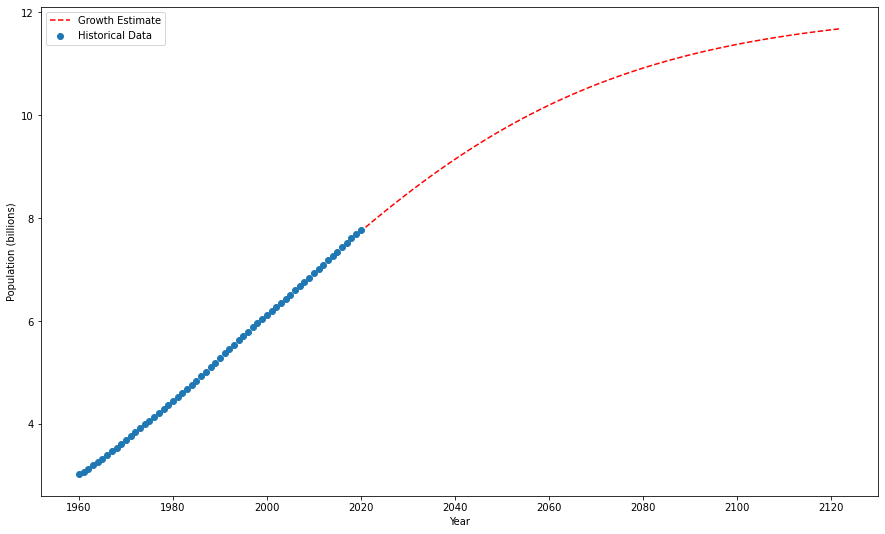

In [8]:
forecasted_years = np.linspace(2021, 2122) # Years to predict
plt.figure(figsize=(15,9))
plt.scatter(years, population_data, label='Historical Data') # Plotting the historical data
plt.plot(forecasted_years, logistic_function(forecasted_years, *params), 'r--',label='Growth Estimate') # Plotting the forecasted data
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.show()